In [1]:
from wrfpywind import data_preprocess as pp
import warnings
warnings.filterwarnings('ignore')

import enspp.bma as bma
import enspp.vis as vis

In [2]:
wrfens = pp.fmt_wrfens_wspd(wrfout_headdir='../data/', 
                    wrfout_dirs=['28mp4lw4sw2lsm5pbl1cu/',  # Lee 2017
                                 '8mp1lw1sw2lsm1pbl1cu/',  # Draxl 2014a
                                 '8mp1lw1sw2lsm2pbl1cu/',  # Draxl 2014b
                                 '8mp1lw1sw2lsm2pbl3cu/',  # Vernon 2018
                                 '8mp4lw2sw2lsm5pbl3cu/',  # Optis 2021
                                 ],
                    wrfout_files=['ow_buoy_wrfout_d03_2020-02-05-2020-02-11',
                                #   'ow_buoy_wrfout_d03_2020-06-03-2020-06-09',
                                #   'ow_buoy_wrfout_d03_2020-07-01-2020-07-07',
                                #   'ow_buoy_wrfout_d03_2020-11-26-2020-12-02',
                                  ],
                    model_names=['Lee 2017', 'Draxl 2014a', 'Draxl 2014b', 'Veron 2018', 'Optis 2021'],
                    heights=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
                    locations=['south', 'north']
                    )

In [3]:
obs = pp.fmt_buoy_wspd(
                    #    data_path='/Users/jeffreysward/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/oshwind/wrfpywind/wrfpywind/data/nyserda_buoy/',
                       data_path='/share/mzhang/jas983/wrf_data/oshwind/wrfpywind/wrfpywind/data/nyserda_buoy/', 
                       south_dates_str='20190904_20210207', north_dates_str='20190812_20210207', 
                       heights=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
                       start_date='01-01-2020', end_date='12-31-2020')

In [4]:
train_da = wrfens.sel(Time=slice('2020-02-05', '2020-02-10'))

In [5]:
train_df = bma.fmt_training_data(train_da, obs)

In [6]:
fit = bma.get_bma_fit(train_df)
print(fit)

$biasCoefs
[1] 1.5681511 0.8912485

$varCoefs
[1] 2.060378e+00 5.926980e-15

$weights
   Lee 2017 Draxl 2014a Draxl 2014b  Veron 2018  Optis 2021 
 0.34480300  0.19491841  0.21004349  0.05466452  0.19557058 

$nIter
[1] 208

$loglikelihood
[1] -3449.187

$power
[1] 1

$startupSpeed
[1] 0

$call
fitBMAgamma(ensembleData = train_ensd, control = controlBMAgamma(startupSpeed = 0))

attr(,"class")
[1] "fitBMAgamma" "fitBMA"     



In [14]:
test_da = wrfens.sel(Time=slice('2020-02-11', '2020-02-11'), location='south', height=100)

In [15]:
fx = bma.quantile_fx(fit, test_da, obs)

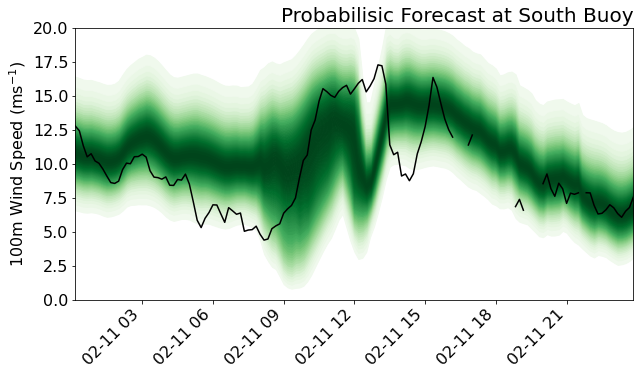

In [17]:
vis.fan(fx=fx, obs=obs.sel(location='south', height=100).squeeze(), p1=None, p2=None, t_issue='02/11/2020', n_days=1, fx_res='10T', title='Probabilisic Forecast at South Buoy', 
    percentile_vals=None, fig_w=10, fig_h=5, ylab=True, ylab_txt='100m Wind Speed (ms$^{-1}$)', 
    show_fig=True, save_fig=True, fig_path='../data/plots/fan_plot_20200211_south.png', max=20)